In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import collections

import IPython

In [2]:
data_folder = '../output-explore-infl-logreg/'
data_filename = 'explore-infl-logreg-data-hospital-prop-0.1-subsets-5-subset_seed-13-center-data-False.npz'
f = np.load(os.path.join(data_folder, data_filename))
f = collections.defaultdict(lambda: None, f)

initial_train_losses = f['initial_train_losses']
initial_test_losses = f['initial_test_losses']
initial_train_margins = f['initial_train_margins']
initial_test_margins = f['initial_test_margins']
grad_loss = f['grad_loss']
test_points = f['test_points']
fixed_test_pred_infl = f['fixed_test_pred_infl']
fixed_test_pred_margin_infl = f['fixed_test_pred_margin_infl']
subset_tags = f['subset_tags']
subset_indices = f['subset_indices']
subset_train_losses = f['subset_train_losses']
subset_test_losses = f['subset_test_losses']
subset_train_margins = f['subset_train_margins']
subset_test_margins = f['subset_test_margins']
subset_self_influences = f['subset_self_influences']

unique_tags = np.unique(subset_tags)
unique_subset_colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
assert len(unique_subset_colors) >= len(unique_tags)
tag_to_color = dict(zip(unique_tags, range(len(unique_tags))))
subset_colors = [unique_subset_colors[tag_to_color[tag]] for tag in subset_tags]

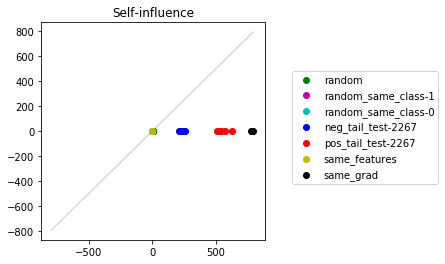

In [3]:
# Plot self-influence actual vs predicted
plt.figure(figsize=(4,4))
W = 0
labels = set()
for subset_num, indices in enumerate(subset_indices):
    subset_initial_losses = np.sum(initial_train_losses[indices])
    subset_retrained_losses = np.sum(subset_train_losses[subset_num][indices])
    subset_actl_infl = subset_retrained_losses - subset_initial_losses
    subset_pred_infl = subset_self_influences[subset_num]
    W = max(W, np.max(np.abs(subset_actl_infl)), np.max(np.abs(subset_pred_infl)))
    if subset_tags[subset_num] not in labels:
        label = subset_tags[subset_num]
        labels.add(label)
    else:
        label = None
    plt.scatter(subset_actl_infl, subset_pred_infl, color=subset_colors[subset_num], label=label)
    W = max(W, np.max(np.abs(subset_actl_infl)), np.max(np.abs(subset_pred_infl)))

plt.plot([-W, W], [-W, W],color='grey',alpha=0.3)
plt.title('Self-influence')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), ncol=1)
plt.xalb

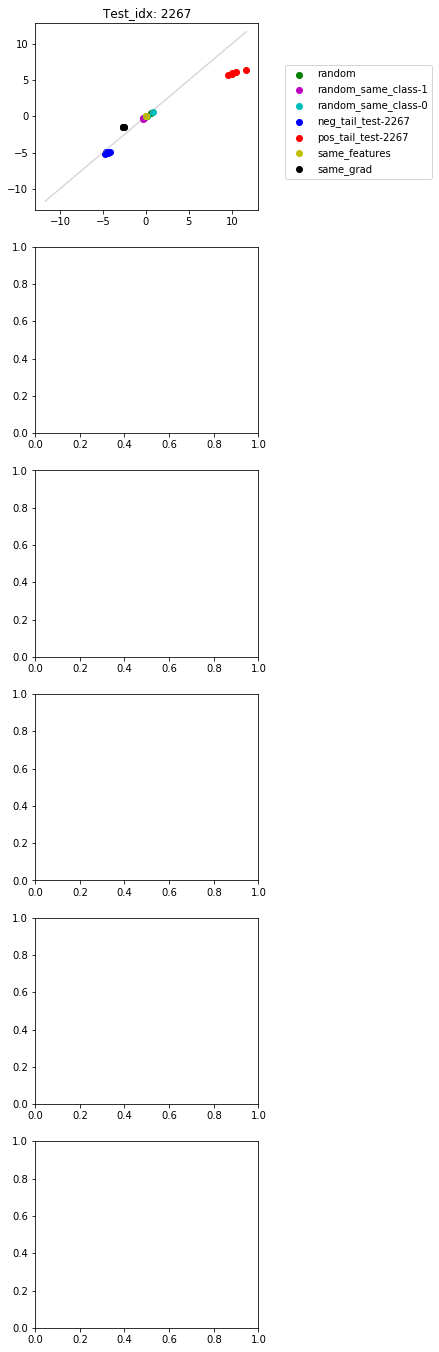

In [4]:
# Plot fixed test point actual vs predicted
fig, axs = plt.subplots(len(test_points), 1, figsize=(4, 4 * len(test_points)), squeeze=False)

for i, test_idx in enumerate(test_points):
    if i > 0: break
    W = 0
    subset_initial_losses = np.array(initial_test_losses[test_idx])
    labels = set()
    for subset_num, indices in enumerate(subset_indices):
        subset_retrained_losses = np.array(subset_test_losses[subset_num][test_idx])
        subset_actl_infl = subset_retrained_losses - subset_initial_losses
        subset_pred_infl = np.sum(fixed_test_pred_infl[i][indices])
        if subset_tags[subset_num] not in labels:
            label = subset_tags[subset_num]
            labels.add(label)
        else:
            label = None
        axs[i][0].scatter(subset_actl_infl, subset_pred_infl, color=subset_colors[subset_num], label=label)
        W = max(W, np.max(np.abs(subset_actl_infl)), np.max(np.abs(subset_pred_infl)))
        
    axs[i][0].plot([-W, W], [-W, W],color='grey',alpha=0.3)
    axs[i][0].set_title('Test_idx: {}'.format(test_idx))
    axs[i][0].legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), ncol=1)
    axs[i][0].set_xlabel('Actual influence on test pt')
    axs[i][0].set_ylabel('Predicted influence on test pt')